# Notebook to analyze data related to DMS cultures

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["svg.fonttype"] = "none"

## Specify paths

In [2]:
culture_data = "../growth_data/20250327_cultures_with_previous_run.xlsx"
graph_outpath = "../graphs/"

## Import dataframe

In [3]:
df = pd.read_excel(culture_data, header=0)
df

,strain,id_number,locus,pool_type,compound,replicate,t1_time (hh:mm:ss),cell_concentration_t1_start,OD_t1_end,cell_concentration_t1_end,nb_gen_t1,cell_concentration_t2_start,t2_time (hh:mm:ss),OD_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen
0,BY4741,1,FKS1-HS1,single,none,1,06:30:00,2628.149098,1.5690,34234.870364,3.703348,973.294944,04:38:00,1.04725,14467.134739,2.144124,5.847471
1,BY4741,2,FKS1-HS1,single,none,2,06:30:00,2467.424851,1.3950,31443.408324,3.671680,905.959338,04:38:00,1.16425,14547.458127,2.105240,5.776920
2,BY4741,3,FKS1-HS1,single,none,3,05:30:00,2548.169968,0.8810,20323.180680,2.995593,763.327959,04:38:00,1.34175,14562.222282,2.073284,5.068877
3,BY4741,4,FKS1-HS1,single,caspofungin,1,07:30:00,2628.149098,0.8935,24516.867003,3.221656,846.699126,05:00:00,1.34200,20221.496158,2.296620,5.518276
4,BY4741,5,FKS1-HS1,single,caspofungin,2,07:30:00,2467.424851,1.0895,22040.029291,3.159048,779.471376,05:00:00,1.04400,16520.446944,2.444758,5.603806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,BY4741,108,FKS1-HS3,single,micafungin,2,10:37:00,3012.134005,0.7470,12207.066658,2.018859,2451.218204,11:15:00,4.32000,31588.020445,3.687807,5.706665
224,BY4741,109,FKS1-HS3,single,micafungin,3,10:37:00,2963.009054,0.6670,10453.998586,1.818920,2350.974195,11:15:00,4.21000,34968.985482,3.894745,5.713665
225,BY4741,110,FKS1-HS3,single,anidulafungin,1,07:50:00,3855.256329,0.7940,14021.465292,1.862738,2648.891428,14:00:00,5.57000,43221.756657,4.028297,5.891036
226,BY4741,111,FKS1-HS3,single,anidulafungin,2,07:50:00,3012.134005,1.0620,17582.524924,2.545284,2483.407475,14:00:00,5.14000,38779.211799,3.964891,6.510175


## Convert timeframes to h

In [4]:
def convert_to_h(t):
    from datetime import datetime

    if pd.isna(t):
        return np.nan
    else:
        delta = datetime.strptime(str(t), "%H:%M:%S") - datetime.strptime(
            "00:00:00", "%H:%M:%S"
        )
        hour_delta = delta.total_seconds() / 3600
        return round(hour_delta, 2)

In [5]:
df["t1_time"] = df["t1_time (hh:mm:ss)"].apply(lambda x: convert_to_h(x))
df["t2_time"] = df["t2_time (hh:mm:ss)"].apply(lambda x: convert_to_h(x))
df["selection_time"] = df["t1_time"] + df["t2_time"]
df

,strain,id_number,locus,pool_type,compound,replicate,t1_time (hh:mm:ss),cell_concentration_t1_start,OD_t1_end,cell_concentration_t1_end,nb_gen_t1,cell_concentration_t2_start,t2_time (hh:mm:ss),OD_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen,t1_time,t2_time,selection_time
0,BY4741,1,FKS1-HS1,single,none,1,06:30:00,2628.149098,1.5690,34234.870364,3.703348,973.294944,04:38:00,1.04725,14467.134739,2.144124,5.847471,6.50,4.63,11.13
1,BY4741,2,FKS1-HS1,single,none,2,06:30:00,2467.424851,1.3950,31443.408324,3.671680,905.959338,04:38:00,1.16425,14547.458127,2.105240,5.776920,6.50,4.63,11.13
2,BY4741,3,FKS1-HS1,single,none,3,05:30:00,2548.169968,0.8810,20323.180680,2.995593,763.327959,04:38:00,1.34175,14562.222282,2.073284,5.068877,5.50,4.63,10.13
3,BY4741,4,FKS1-HS1,single,caspofungin,1,07:30:00,2628.149098,0.8935,24516.867003,3.221656,846.699126,05:00:00,1.34200,20221.496158,2.296620,5.518276,7.50,5.00,12.50
4,BY4741,5,FKS1-HS1,single,caspofungin,2,07:30:00,2467.424851,1.0895,22040.029291,3.159048,779.471376,05:00:00,1.04400,16520.446944,2.444758,5.603806,7.50,5.00,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,BY4741,108,FKS1-HS3,single,micafungin,2,10:37:00,3012.134005,0.7470,12207.066658,2.018859,2451.218204,11:15:00,4.32000,31588.020445,3.687807,5.706665,10.62,11.25,21.87
224,BY4741,109,FKS1-HS3,single,micafungin,3,10:37:00,2963.009054,0.6670,10453.998586,1.818920,2350.974195,11:15:00,4.21000,34968.985482,3.894745,5.713665,10.62,11.25,21.87
225,BY4741,110,FKS1-HS3,single,anidulafungin,1,07:50:00,3855.256329,0.7940,14021.465292,1.862738,2648.891428,14:00:00,5.57000,43221.756657,4.028297,5.891036,7.83,14.00,21.83
226,BY4741,111,FKS1-HS3,single,anidulafungin,2,07:50:00,3012.134005,1.0620,17582.524924,2.545284,2483.407475,14:00:00,5.14000,38779.211799,3.964891,6.510175,7.83,14.00,21.83


## Calculate growth rate (nb_gen /h)

In [6]:
def calculate_growth_rate(nbgen, t):

    if pd.isna(nbgen) | pd.isna(t):
        return np.nan
    else:
        g = round(nbgen / t, 2)
        return g

In [7]:
df["growth_rate_t1"] = df.apply(
    lambda row: calculate_growth_rate(row.nb_gen_t1, row.t1_time), axis=1
)
df["growth_rate_t2"] = df.apply(
    lambda row: calculate_growth_rate(row.nb_gen_t2, row.t2_time), axis=1
)
df

,strain,id_number,locus,pool_type,compound,replicate,t1_time (hh:mm:ss),cell_concentration_t1_start,OD_t1_end,cell_concentration_t1_end,...,t2_time (hh:mm:ss),OD_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen,t1_time,t2_time,selection_time,growth_rate_t1,growth_rate_t2
0,BY4741,1,FKS1-HS1,single,none,1,06:30:00,2628.149098,1.5690,34234.870364,...,04:38:00,1.04725,14467.134739,2.144124,5.847471,6.50,4.63,11.13,0.57,0.46
1,BY4741,2,FKS1-HS1,single,none,2,06:30:00,2467.424851,1.3950,31443.408324,...,04:38:00,1.16425,14547.458127,2.105240,5.776920,6.50,4.63,11.13,0.56,0.45
2,BY4741,3,FKS1-HS1,single,none,3,05:30:00,2548.169968,0.8810,20323.180680,...,04:38:00,1.34175,14562.222282,2.073284,5.068877,5.50,4.63,10.13,0.54,0.45
3,BY4741,4,FKS1-HS1,single,caspofungin,1,07:30:00,2628.149098,0.8935,24516.867003,...,05:00:00,1.34200,20221.496158,2.296620,5.518276,7.50,5.00,12.50,0.43,0.46
4,BY4741,5,FKS1-HS1,single,caspofungin,2,07:30:00,2467.424851,1.0895,22040.029291,...,05:00:00,1.04400,16520.446944,2.444758,5.603806,7.50,5.00,12.50,0.42,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,BY4741,108,FKS1-HS3,single,micafungin,2,10:37:00,3012.134005,0.7470,12207.066658,...,11:15:00,4.32000,31588.020445,3.687807,5.706665,10.62,11.25,21.87,0.19,0.33
224,BY4741,109,FKS1-HS3,single,micafungin,3,10:37:00,2963.009054,0.6670,10453.998586,...,11:15:00,4.21000,34968.985482,3.894745,5.713665,10.62,11.25,21.87,0.17,0.35
225,BY4741,110,FKS1-HS3,single,anidulafungin,1,07:50:00,3855.256329,0.7940,14021.465292,...,14:00:00,5.57000,43221.756657,4.028297,5.891036,7.83,14.00,21.83,0.24,0.29
226,BY4741,111,FKS1-HS3,single,anidulafungin,2,07:50:00,3012.134005,1.0620,17582.524924,...,14:00:00,5.14000,38779.211799,3.964891,6.510175,7.83,14.00,21.83,0.33,0.28


In [8]:
df[
    [
        "strain",
        "id_number",
        "pool_type",
        "locus",
        "compound",
        "replicate",
        "total_nb_gen",
        "selection_time",
    ]
].to_excel("../growth_data/nbgen.xlsx")

## Pivot

In [9]:
lcols = ["pool_type", "strain", "locus", "compound", "replicate", "total_nb_gen"]
longOD = df.melt(
    id_vars=lcols,
    value_vars=["OD_t1_end", "OD_t2_end"],
    var_name="timepoint",
    value_name="OD",
)
longOD["timepoint"] = longOD["timepoint"].str[-6:-4]
longcyto = df.melt(
    id_vars=lcols,
    value_vars=["cell_concentration_t1_end", "cell_concentration_t2_end"],
    var_name="timepoint",
    value_name="cyto",
)
longcyto["timepoint"] = longcyto["timepoint"].str[-6:-4]
longgen = df.melt(
    id_vars=lcols,
    value_vars=["nb_gen_t1", "nb_gen_t2"],
    var_name="timepoint",
    value_name="nbgen",
)
corr = longOD.sort_values(by=lcols)
corr["cyto"] = longcyto.sort_values(by=lcols)[["cyto"]] / 1000
corr["nbgen"] = longgen.sort_values(by=lcols)[["nbgen"]]
corr["paralog"] = corr.locus.apply(lambda x: x.split("-")[0])
corr

,pool_type,strain,locus,compound,replicate,total_nb_gen,timepoint,OD,cyto,nbgen,paralog
21,double,BY4741,FKS1-HS1,anidulafungin,1,5.165392,t1,1.38250,26.011035,3.253733,FKS1
249,double,BY4741,FKS1-HS1,anidulafungin,1,5.165392,t2,0.88150,10.618190,1.911659,FKS1
22,double,BY4741,FKS1-HS1,anidulafungin,2,5.498879,t1,1.38250,27.139256,3.374401,FKS1
250,double,BY4741,FKS1-HS1,anidulafungin,2,5.498879,t2,0.90700,12.839720,2.124478,FKS1
23,double,BY4741,FKS1-HS1,anidulafungin,3,5.392907,t1,1.39550,28.001531,3.436182,FKS1
...,...,...,...,...,...,...,...,...,...,...,...
414,single,R1158,FKS2-HS2,none,1,6.585017,t2,2.11475,32.657641,3.111356,FKS2
187,single,R1158,FKS2-HS2,none,2,6.544101,t1,1.24000,38.616978,3.594411,FKS2
415,single,R1158,FKS2-HS2,none,2,6.544101,t2,2.01275,29.834805,2.949689,FKS2
188,single,R1158,FKS2-HS2,none,3,6.757583,t1,1.13900,35.965735,3.564759,FKS2


## Plot

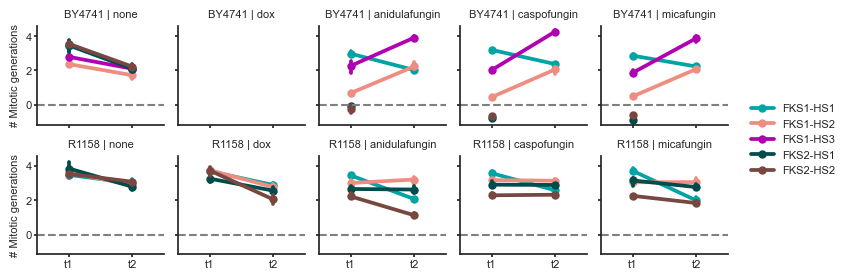

In [10]:
sns.set_theme(
    rc={
        "font.family": "Arial",
        "font.size": 8,
        "legend.title_fontsize": 8,
        "legend.fontsize": 8,
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "xtick.major.pad": 2,
        "ytick.major.pad": 2,
        "xtick.bottom": True,
        "ytick.left": True,
        "xtick.major.size": 2,
        "ytick.major.size": 2,
    },
    style="ticks",
)

g = sns.catplot(
    corr[corr.pool_type == "single"],
    row="strain",
    col="compound",
    col_order=["none", "dox", "anidulafungin", "caspofungin", "micafungin"],
    x="timepoint",
    y="nbgen",
    errorbar=("pi", 100),
    hue="locus",
    hue_order=["FKS1-HS1", "FKS1-HS2", "FKS1-HS3", "FKS2-HS1", "FKS2-HS2"],
    palette=["#00A4A4", "#EE8D81", "#b100b1", "#004B4B", "#774740"],
    kind="point",
    markersize=4,
    height=1.5,
)
g.map(plt.axhline, y=0, ls="--", c="grey")
g.set_axis_labels("", "# Mitotic generations")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g._legend.set_title(None)

plt.savefig(f"{graph_outpath}/nb_gens.svg", format="svg", dpi=300)

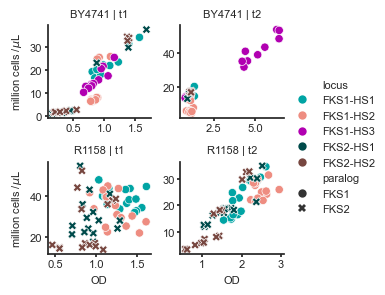

In [11]:
sns.set_theme(
    rc={
        "font.family": "Arial",
        "font.size": 8,
        "legend.title_fontsize": 8,
        "legend.fontsize": 8,
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "xtick.major.pad": 2,
        "ytick.major.pad": 2,
        "xtick.bottom": True,
        "ytick.left": True,
        "xtick.major.size": 2,
        "ytick.major.size": 2,
    },
    style="ticks",
)

g = sns.relplot(
    corr[corr.pool_type == "single"],
    row="strain",
    col="timepoint",
    x="OD",
    y="cyto",
    hue="locus",
    hue_order=["FKS1-HS1", "FKS1-HS2", "FKS1-HS3", "FKS2-HS1", "FKS2-HS2"],
    palette=["#00A4A4", "#EE8D81", "#b100b1", "#004B4B", "#774740"],
    style="paralog",
    height=1.5,
    facet_kws={"sharex": False, "sharey": False},
)

g.set_axis_labels("OD", r"million cells /$\mu$L")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g._legend.set_title(None)

plt.savefig(f"{graph_outpath}/corr_cyto.svg", format="svg", dpi=300)